In [ ]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Default_Fin.csv")

# **Question 1**

In [ ]:
newdf=df[(df["Defaulted?"]==1) & (df["Annual Salary"]>100000) & (df["Bank Balance"]>5000) & (df["Employed"]!=0)]
newdf['Index'].count()

206

# **Question 2**

In [ ]:
def compound_interest(principle):
 
    
    Amount = principle * (pow((1 + 2.5 / 100), 15))
    CI = Amount - principle
    return CI
  

newdf['cpd']=newdf['Bank Balance'].apply(compound_interest)
newdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Index,Employed,Bank Balance,Annual Salary,Defaulted?,cpd
206,207,1,22675.20,587474.04,1,10165.250585
243,244,1,23573.76,468655.08,1,10568.073385
263,264,1,18364.20,360045.84,1,8232.637189
341,342,1,19713.84,562283.40,1,8837.678327
345,346,1,23899.80,505600.44,1,10714.236520
...,...,...,...,...,...,...
9893,9894,1,27460.92,624522.84,1,12310.680086
9912,9913,1,25786.80,531719.04,1,11560.175160
9949,9950,1,21003.00,618947.28,1,9415.606391
9951,9952,1,18187.32,584262.12,1,8153.342210


In [ ]:
newdf['cpd'].max()

13443.673008505273

# **Question 3**

In [ ]:
sum=0
for i in df.Index:
 if df.loc[i-1,'Defaulted?']==0:
   sum+=(2.5*df.loc[i-1,'Bank Balance']*15)/100
print(round(sum,4))

34972758.9


In [ ]:

df["Grace Given?"]=((df["Defaulted?"]==1) & (df["Annual Salary"]>100000) & (df["Bank Balance"]>5000)).astype(int)

# **Question 4**

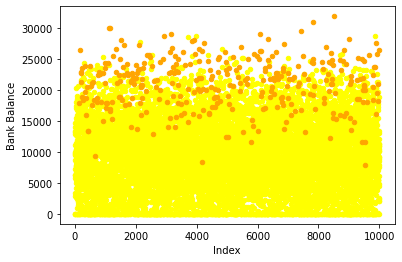

In [ ]:

df[df["Grace Given?"] == 0].plot(kind = "scatter", x = "Index", y = "Bank Balance", color = "yellow", ax=plt.gca())


df[df["Grace Given?"] == 1].plot(kind = "scatter", x = "Index", y = "Bank Balance", color = "orange", ax=plt.gca())

plt.show()

# **Question 5**

In [ ]:
Tmedian=df["Bank Balance"].median()
Gmedian=df["Bank Balance"][(df["Annual Salary"]>100000) & (df["Bank Balance"]>5000)].median()
difference=Gmedian-Tmedian
print(round(difference,4))

1614.42


# **Question 6**

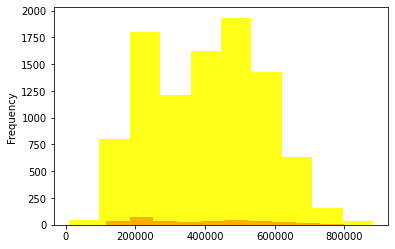

In [ ]:

non_eligible_people=df.loc[df["Grace Given?"]==0,"Annual Salary"]
non_eligible_people.plot.hist(color="yellow",alpha=0.9)


eligible_people=df.loc[df["Grace Given?"]==1,"Annual Salary"]
eligible_people.plot.hist(color="orange",alpha=0.9)

plt.show()